In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import time

In [38]:
customers=pd.read_csv("starbucks_customer_level.csv",sep=";")

In [39]:
customers.head()

,gender,age,person,became_member_on,income,total_amount,total_rewarded,transactions_num,offers_received,offers_viewed,...,avg_reward_size,avg_bogo_size,avg_discount_size,offers_rr,offers_cvr,bogo_rr,bogo_cvr,discount_rr,discount_cvr,informational_rr
0,NaN,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017,NaN,20.40,5.0,9,5.0,5.0,...,2.5,0.0,2.5,100.0,40.0,0.0,0.00,100.00,40.0,0.0
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017,112000.0,77.01,0.0,3,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2,NaN,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018,NaN,14.30,0.0,6,2.0,1.0,...,0.0,0.0,0.0,50.0,0.0,100.0,0.00,0.00,0.0,0.0
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017,100000.0,159.27,15.0,7,4.0,4.0,...,7.5,7.5,0.0,100.0,50.0,100.0,66.67,0.00,0.0,100.0
4,NaN,NaN,a03223e636434f42ac4c3df47e8bac43,2017,NaN,4.65,0.0,3,5.0,3.0,...,0.0,0.0,0.0,60.0,0.0,0.0,0.00,66.67,0.0,50.0


In [40]:
customers.isnull().sum()

gender                    2175
age                       2175
person                       0
became_member_on             0
income                    2175
total_amount                 0
total_rewarded               0
transactions_num             0
offers_received              0
offers_viewed                0
offers_completed             0
bogo_received                0
bogo_viewed                  0
bogo_completed               0
discount_received            0
discount_viewed              0
discount_completed           0
informational_received       0
informational_viewed         0
total_bogo                   0
total_discount               0
avg_order_size               0
avg_reward_size              0
avg_bogo_size                0
avg_discount_size            0
offers_rr                    0
offers_cvr                   0
bogo_rr                      0
bogo_cvr                     0
discount_rr                  0
discount_cvr                 0
informational_rr             0
dtype: i

In [41]:
starbucks_imputed=customers.copy()

In [42]:
imputer=SimpleImputer(strategy="median")
imputed=imputer.fit_transform(starbucks_imputed[['age','income']])

In [43]:
starbucks_imputed[['age','income']]=pd.DataFrame(imputed,columns=['age','income'])

In [44]:
starbucks_imputed.head()

,gender,age,person,became_member_on,income,total_amount,total_rewarded,transactions_num,offers_received,offers_viewed,...,avg_reward_size,avg_bogo_size,avg_discount_size,offers_rr,offers_cvr,bogo_rr,bogo_cvr,discount_rr,discount_cvr,informational_rr
0,NaN,55.0,68be06ca386d4c31939f3a4f0e3dd783,2017,64000.0,20.40,5.0,9,5.0,5.0,...,2.5,0.0,2.5,100.0,40.0,0.0,0.00,100.00,40.0,0.0
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017,112000.0,77.01,0.0,3,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2,NaN,55.0,38fe809add3b4fcf9315a9694bb96ff5,2018,64000.0,14.30,0.0,6,2.0,1.0,...,0.0,0.0,0.0,50.0,0.0,100.0,0.00,0.00,0.0,0.0
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017,100000.0,159.27,15.0,7,4.0,4.0,...,7.5,7.5,0.0,100.0,50.0,100.0,66.67,0.00,0.0,100.0
4,NaN,55.0,a03223e636434f42ac4c3df47e8bac43,2017,64000.0,4.65,0.0,3,5.0,3.0,...,0.0,0.0,0.0,60.0,0.0,0.0,0.00,66.67,0.0,50.0


In [45]:
v={"gender":starbucks_imputed.gender.mode()[0]}

In [46]:
v

{'gender': 'M'}

In [47]:
starbucks_imputed.fillna(value=v,inplace=True)

In [48]:
starbucks_imputed.head()

,gender,age,person,became_member_on,income,total_amount,total_rewarded,transactions_num,offers_received,offers_viewed,...,avg_reward_size,avg_bogo_size,avg_discount_size,offers_rr,offers_cvr,bogo_rr,bogo_cvr,discount_rr,discount_cvr,informational_rr
0,M,55.0,68be06ca386d4c31939f3a4f0e3dd783,2017,64000.0,20.40,5.0,9,5.0,5.0,...,2.5,0.0,2.5,100.0,40.0,0.0,0.00,100.00,40.0,0.0
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017,112000.0,77.01,0.0,3,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
2,M,55.0,38fe809add3b4fcf9315a9694bb96ff5,2018,64000.0,14.30,0.0,6,2.0,1.0,...,0.0,0.0,0.0,50.0,0.0,100.0,0.00,0.00,0.0,0.0
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017,100000.0,159.27,15.0,7,4.0,4.0,...,7.5,7.5,0.0,100.0,50.0,100.0,66.67,0.00,0.0,100.0
4,M,55.0,a03223e636434f42ac4c3df47e8bac43,2017,64000.0,4.65,0.0,3,5.0,3.0,...,0.0,0.0,0.0,60.0,0.0,0.0,0.00,66.67,0.0,50.0


In [49]:
starbucks_imputed.isnull().sum()

gender                    0
age                       0
person                    0
became_member_on          0
income                    0
total_amount              0
total_rewarded            0
transactions_num          0
offers_received           0
offers_viewed             0
offers_completed          0
bogo_received             0
bogo_viewed               0
bogo_completed            0
discount_received         0
discount_viewed           0
discount_completed        0
informational_received    0
informational_viewed      0
total_bogo                0
total_discount            0
avg_order_size            0
avg_reward_size           0
avg_bogo_size             0
avg_discount_size         0
offers_rr                 0
offers_cvr                0
bogo_rr                   0
bogo_cvr                  0
discount_rr               0
discount_cvr              0
informational_rr          0
dtype: int64

In [50]:
starbucks_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  17000 non-null  object 
 1   age                     17000 non-null  float64
 2   person                  17000 non-null  object 
 3   became_member_on        17000 non-null  int64  
 4   income                  17000 non-null  float64
 5   total_amount            17000 non-null  float64
 6   total_rewarded          17000 non-null  float64
 7   transactions_num        17000 non-null  int64  
 8   offers_received         17000 non-null  float64
 9   offers_viewed           17000 non-null  float64
 10  offers_completed        17000 non-null  float64
 11  bogo_received           17000 non-null  float64
 12  bogo_viewed             17000 non-null  float64
 13  bogo_completed          17000 non-null  float64
 14  discount_received       17000 non-null

## One hot encoding categorical variables

In [51]:
starbucks_ohe=starbucks_imputed.copy()

In [52]:
starbucks_ohe.drop("person",axis=1,inplace=True)

In [53]:
starbucks_ohe["became_member_on"]=starbucks_ohe.became_member_on.astype(str)

In [54]:
cat_col=starbucks_ohe.columns[(starbucks_ohe.dtypes=="category")|(starbucks_ohe.dtypes=="object")]
cat_col

Index(['gender', 'became_member_on'], dtype='object')

In [55]:
starbucks_ohe=pd.get_dummies(starbucks_ohe,columns=cat_col)

In [56]:
starbucks_ohe.head()

,age,income,total_amount,total_rewarded,transactions_num,offers_received,offers_viewed,offers_completed,bogo_received,bogo_viewed,...,informational_rr,gender_F,gender_M,gender_O,became_member_on_2013,became_member_on_2014,became_member_on_2015,became_member_on_2016,became_member_on_2017,became_member_on_2018
0,55.0,64000.0,20.40,5.0,9,5.0,5.0,2.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,1,0
1,55.0,112000.0,77.01,0.0,3,2.0,0.0,0.0,1.0,0.0,...,0.0,1,0,0,0,0,0,0,1,0
2,55.0,64000.0,14.30,0.0,6,2.0,1.0,0.0,1.0,1.0,...,0.0,0,1,0,0,0,0,0,0,1
3,75.0,100000.0,159.27,15.0,7,4.0,4.0,2.0,3.0,3.0,...,100.0,1,0,0,0,0,0,0,1,0
4,55.0,64000.0,4.65,0.0,3,5.0,3.0,0.0,0.0,0.0,...,50.0,0,1,0,0,0,0,0,1,0


In [57]:
starbucks_ohe.shape

(17000, 38)

In [58]:
scaler=StandardScaler().fit(starbucks_ohe)
starbucks_scaled=scaler.transform(starbucks_ohe)

In [59]:
starbucks_ohe

,age,income,total_amount,total_rewarded,transactions_num,offers_received,offers_viewed,offers_completed,bogo_received,bogo_viewed,...,informational_rr,gender_F,gender_M,gender_O,became_member_on_2013,became_member_on_2014,became_member_on_2015,became_member_on_2016,became_member_on_2017,became_member_on_2018
0,55.0,64000.0,20.40,5.0,9,5.0,5.0,2.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,1,0
1,55.0,112000.0,77.01,0.0,3,2.0,0.0,0.0,1.0,0.0,...,0.0,1,0,0,0,0,0,0,1,0
2,55.0,64000.0,14.30,0.0,6,2.0,1.0,0.0,1.0,1.0,...,0.0,0,1,0,0,0,0,0,0,1
3,75.0,100000.0,159.27,15.0,7,4.0,4.0,2.0,3.0,3.0,...,100.0,1,0,0,0,0,0,0,1,0
4,55.0,64000.0,4.65,0.0,3,5.0,3.0,0.0,0.0,0.0,...,50.0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,45.0,54000.0,20.03,0.0,7,3.0,3.0,0.0,1.0,1.0,...,100.0,1,0,0,0,0,0,0,0,1
16996,61.0,72000.0,25.97,0.0,7,3.0,1.0,0.0,1.0,0.0,...,50.0,0,1,0,0,0,0,0,0,1
16997,49.0,73000.0,39.74,0.0,8,3.0,1.0,0.0,0.0,0.0,...,50.0,0,1,0,0,0,0,0,1,0
16998,83.0,50000.0,189.67,10.0,14,3.0,3.0,1.0,3.0,3.0,...,0.0,1,0,0,0,0,0,1,0,0


In [60]:
#checking scaling results on first 5 features
starbucks_scaled.std(axis=0)[:5], starbucks_scaled.mean(axis=0)[:5]

(array([1., 1., 1., 1., 1.]),
 array([-1.27897692e-16, -1.64051779e-16,  1.04700562e-16,  7.61743609e-17,
         5.18278231e-17]))

In [61]:
starbucks_scaled

array([[ 0.03257802, -0.06073292, -0.66740053, ..., -0.51155565,
         1.27589881, -0.57264082],
       [ 0.03257802,  2.31854896, -0.2178255 , ..., -0.51155565,
         1.27589881, -0.57264082],
       [ 0.03257802, -0.06073292, -0.71584441, ..., -0.51155565,
        -0.78376122,  1.74629534],
       ...,
       [-0.33700911,  0.38538243, -0.51380963, ..., -0.51155565,
         1.27589881, -0.57264082],
       [ 1.75731796, -0.75469014,  0.67687725, ...,  1.95482155,
        -0.78376122, -0.57264082],
       [ 0.463763  ,  0.83149779,  0.30640074, ..., -0.51155565,
         1.27589881, -0.57264082]])

Note: scaler works as expected - all features were transformed correctly and have mean around 0 and std 1.

## Dimensionality Reduction via PCA

In [62]:
pca=PCA()

In [63]:
x_pca=pca.fit_transform(starbucks_scaled)

In [64]:
x_pca

array([[ 6.36623205e-01,  5.39824704e+00, -4.77924369e-01, ...,
        -7.85673544e-16,  8.19273670e-16,  2.79797012e-16],
       [-3.95279709e+00, -9.98429585e-01,  4.89050392e+00, ...,
         1.58525224e-15,  5.67903592e-15,  8.16959687e-16],
       [-4.07487247e+00, -1.34768071e+00,  1.39973087e+00, ...,
        -3.22535501e-15,  5.59405204e-15,  6.57674406e-16],
       ...,
       [-4.27871976e+00, -2.22009733e-01,  1.68936312e+00, ...,
        -1.50645976e-16,  2.68606682e-17,  2.08113610e-16],
       [ 1.74059469e+00, -4.14061077e+00,  1.41968064e+00, ...,
        -7.73696928e-17, -3.53288061e-17,  1.28149232e-16],
       [-2.14639729e-01,  2.24639916e+00,  3.70187146e+00, ...,
        -1.11510925e-16, -1.06040784e-17,  5.54642259e-17]])

NOTE:  the eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance(most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

In [65]:
pca.explained_variance_ratio_

array([2.28532144e-01, 1.29167542e-01, 8.24126281e-02, 7.12772453e-02,
       5.48027759e-02, 4.12256339e-02, 3.92312075e-02, 3.79977059e-02,
       3.74148009e-02, 3.12693950e-02, 3.06702442e-02, 2.71865870e-02,
       2.68915923e-02, 2.66317300e-02, 2.59271930e-02, 1.82418052e-02,
       1.72636689e-02, 1.47149494e-02, 1.11652129e-02, 1.02291999e-02,
       8.28942589e-03, 6.56331939e-03, 5.20735260e-03, 4.33249325e-03,
       3.35141730e-03, 2.98303468e-03, 2.10036354e-03, 1.63029093e-03,
       1.30418640e-03, 8.28750907e-04, 6.86986314e-04, 4.69117857e-04,
       4.50700184e-32, 7.25045230e-33, 2.71742253e-33, 1.01603158e-33,
       1.01603158e-33, 8.73653175e-34])

In [66]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22853214, 0.35769969, 0.44011231, 0.51138956, 0.56619233,
       0.60741797, 0.64664918, 0.68464688, 0.72206168, 0.75333108,
       0.78400132, 0.81118791, 0.8380795 , 0.86471123, 0.89063842,
       0.90888023, 0.9261439 , 0.94085885, 0.95202406, 0.96225326,
       0.97054269, 0.97710601, 0.98231336, 0.98664585, 0.98999727,
       0.9929803 , 0.99508067, 0.99671096, 0.99801514, 0.9988439 ,
       0.99953088, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [67]:
pca.explained_variance_

array([8.68473232e+00, 4.90865535e+00, 3.13186410e+00, 2.70869466e+00,
       2.08262799e+00, 1.56666625e+00, 1.49087358e+00, 1.44399776e+00,
       1.42184607e+00, 1.18830691e+00, 1.16553784e+00, 1.03315108e+00,
       1.02194062e+00, 1.01206527e+00, 9.85291294e-01, 6.93229375e-01,
       6.56058008e-01, 5.59200970e-01, 4.24303048e-01, 3.88732461e-01,
       3.15016714e-01, 2.49420809e-01, 1.97891039e-01, 1.64644428e-01,
       1.27361349e-01, 1.13361986e-01, 7.98185096e-02, 6.19546996e-02,
       4.95619985e-02, 3.14943871e-02, 2.61070156e-02, 1.78275272e-02,
       1.71276145e-30, 2.75533395e-31, 1.03268131e-31, 3.86114712e-32,
       3.86114712e-32, 3.32007736e-32])

In [68]:
np.cumsum(pca.explained_variance_)

array([ 8.68473232, 13.59338767, 16.72525176, 19.43394642, 21.51657441,
       23.08324066, 24.57411424, 26.018112  , 27.43995808, 28.62826499,
       29.79380283, 30.82695391, 31.84889453, 32.8609598 , 33.8462511 ,
       34.53948047, 35.19553848, 35.75473945, 36.1790425 , 36.56777496,
       36.88279168, 37.13221248, 37.33010352, 37.49474795, 37.6221093 ,
       37.73547129, 37.8152898 , 37.8772445 , 37.9268065 , 37.95830088,
       37.9844079 , 38.00223543, 38.00223543, 38.00223543, 38.00223543,
       38.00223543, 38.00223543, 38.00223543])

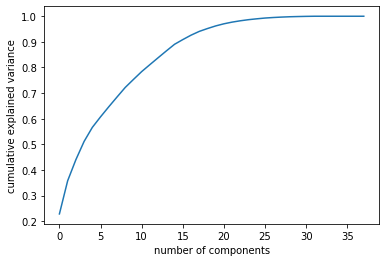

In [69]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [70]:
# Investigate the variance accounted for by each principal component.
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')


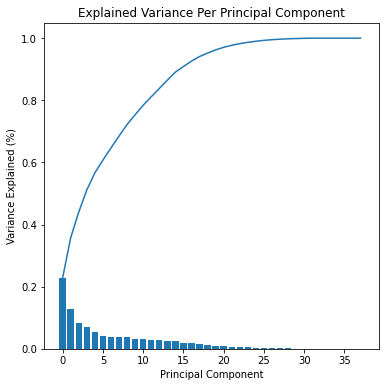

In [71]:
scree_plot(pca)

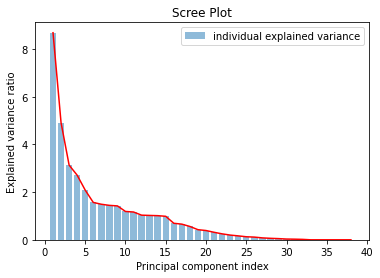

In [72]:
plt.bar(range(1,39), pca.explained_variance_,alpha=0.5, align='center', label='individual explained variance')
#plt.step(range(1,5), np.cumsum(pca.explained_variance_), c= 'y',where='mid',label='cumulative explained variance')
plt.plot(range(1,39), pca.explained_variance_, c = 'r')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Scree Plot');

In [73]:
pca.explained_variance_ratio_

array([2.28532144e-01, 1.29167542e-01, 8.24126281e-02, 7.12772453e-02,
       5.48027759e-02, 4.12256339e-02, 3.92312075e-02, 3.79977059e-02,
       3.74148009e-02, 3.12693950e-02, 3.06702442e-02, 2.71865870e-02,
       2.68915923e-02, 2.66317300e-02, 2.59271930e-02, 1.82418052e-02,
       1.72636689e-02, 1.47149494e-02, 1.11652129e-02, 1.02291999e-02,
       8.28942589e-03, 6.56331939e-03, 5.20735260e-03, 4.33249325e-03,
       3.35141730e-03, 2.98303468e-03, 2.10036354e-03, 1.63029093e-03,
       1.30418640e-03, 8.28750907e-04, 6.86986314e-04, 4.69117857e-04,
       4.50700184e-32, 7.25045230e-33, 2.71742253e-33, 1.01603158e-33,
       1.01603158e-33, 8.73653175e-34])

In [74]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22853214, 0.35769969, 0.44011231, 0.51138956, 0.56619233,
       0.60741797, 0.64664918, 0.68464688, 0.72206168, 0.75333108,
       0.78400132, 0.81118791, 0.8380795 , 0.86471123, 0.89063842,
       0.90888023, 0.9261439 , 0.94085885, 0.95202406, 0.96225326,
       0.97054269, 0.97710601, 0.98231336, 0.98664585, 0.98999727,
       0.9929803 , 0.99508067, 0.99671096, 0.99801514, 0.9988439 ,
       0.99953088, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [75]:
# how many components together explain about 80% of variance?
cum_expl_var_ratio = np.cumsum(pca.explained_variance_ratio_)
components_num = len(cum_expl_var_ratio[cum_expl_var_ratio <= 0.805])
components_num


11

Note: As a rule of thumb, one should keep as many components that together they would explain about 80% of variance.

In [76]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(components_num).fit(starbucks_scaled)
starbucks_pca = pca.transform(starbucks_scaled)

In [77]:
starbucks_pca.shape

(17000, 11)

In [78]:
np.cumsum(pca.explained_variance_ratio_)

array([0.22853214, 0.35769969, 0.44011231, 0.51138956, 0.56619233,
       0.60741795, 0.64664916, 0.68464686, 0.72206165, 0.75333099,
       0.78400097])

## Clustering

In [84]:
# Over a number of different cluster counts...
range_n_clusters = [2, 3, 5, 8, 10, 15]
sum_of_squared_distances = []
since = time.time()

for n_clusters in range_n_clusters:
    cluster_start = time.time()
    print("calculating {} clusters".format(n_clusters))
    # run k-means clustering on the data and...
    clusterer = KMeans(n_clusters=n_clusters, n_init=100, init='k-means++').fit(starbucks_pca)   
    print(f"{n_clusters}: silouhette score: {metrics.silhouette_score(starbucks_pca, clusterer.labels_, metric='euclidean')}")
    # ... compute the average within-cluster distances.
    sum_of_squared_distances.append(clusterer.inertia_)
    print("(Average within cluster distance)sum of squared distances:", clusterer.inertia_)
    #print("time for this cluster:", time.time() - cluster_start)

time_elapsed = time.time() - since
print('Clustering complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

calculating 2 clusters
2: silouhette score: 0.2111305346519143
(Average within cluster distance)sum of squared distances: 399897.51455365855
calculating 3 clusters
3: silouhette score: 0.17437503134097046
(Average within cluster distance)sum of squared distances: 348149.03761926974
calculating 5 clusters
5: silouhette score: 0.1344861846411812
(Average within cluster distance)sum of squared distances: 301962.80491916294
calculating 8 clusters
8: silouhette score: 0.12528672827954226
(Average within cluster distance)sum of squared distances: 273383.36231285194
calculating 10 clusters
10: silouhette score: 0.1161383311441028
(Average within cluster distance)sum of squared distances: 259701.6301300906
calculating 15 clusters
15: silouhette score: 0.11183674939723096
(Average within cluster distance)sum of squared distances: 231813.70166774944
Clustering complete in 1m 10s


### note : average within cluster should be less but the silouhette score must be close to 1 to validate that the data point is correctly matched to its own cluster and poorly matched to its neighbour cluster

In [83]:
clusterer.labels_

array([ 9, 13,  3, ...,  3,  4, 14])

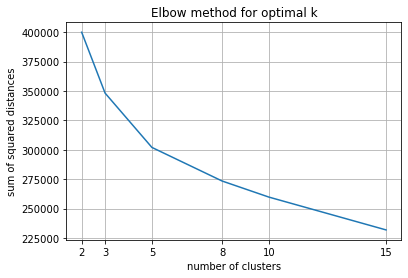

In [86]:
plt.plot(range_n_clusters,sum_of_squared_distances)
plt.xlabel("number of clusters")
plt.xticks(range_n_clusters, range_n_clusters)
plt.ylabel("sum of squared distances")
plt.title("Elbow method for optimal k")
plt.grid()

### Observations:
from above diagram we can say that there are 3 or 5 potential clusters forming however the silhouette score of 3 is more than 5 

In [87]:
# re fit the kmeans model with selected number of clusters and obtain the cluster predictions

In [90]:
clusterer=KMeans(n_clusters=3,n_init=100,init="k-means++").fit(starbucks_pca)
print("silhouette score: ",metrics.silhouette_score(starbucks_pca,clusterer.labels_,metric="euclidean"))

silhouette score:  0.1742512372984821


In [91]:
starbucks_preds=clusterer.predict(starbucks_pca)

In [92]:
starbucks_preds

array([2, 1, 1, ..., 1, 0, 2])

## Model Evaluation

In [93]:
def interpret_cluster(cluster_num, df, minmax):
    '''
    Performs inversing the results of PCA and Scaler to allow cluster interpretation
    Input:
        cluster_num: number of clusters that were used to perform clustering
        df: data frame used for clustering
        minmax (bool): condition whetherminmax scaler was used 
    Output:
        results_df: data frame with inversed values for one cluster                
    '''
    pca_inversed = pca.inverse_transform(clusterer.cluster_centers_[cluster_num, :])
    
    if minmax == True:
        scaler_inversed = np.around(scaler.inverse_transform(pca_inversed.reshape(1, -1)), decimals=2)
        results_df = pd.DataFrame(scaler_inversed.ravel(), df.columns)
    else:
        scaler_inversed = np.around(scaler.inverse_transform(pca_inversed), decimals=2)
        results_df = pd.DataFrame(scaler_inversed, df.columns)
    
    return results_df

In [96]:
def create_cluster_df(cluster_num, df, minmax=False):
    '''
    Creates results dataframe for all clusters and compares them with mean values across each column
    Input:
        cluster_num: number of clusters that were used to perform clustering
        df: data frame used for clustering
        minmax (bool): condition whetherminmax scaler was used 
    Output:
        results_df: data frame with cluster results for all clusters                
    '''  

    cluster_df = pd.DataFrame(interpret_cluster(0, df, minmax))
    cluster_df.drop(0, axis=1, inplace=True)

    for i in range(cluster_num):
        cluster_df['cluster_'+str(i+1)] = interpret_cluster(i, df, minmax)
    means = []
    for each in starbucks_ohe.columns:
        mean = round(starbucks_ohe[each].mean(), 2)
        means.append(mean)
    means_df = pd.DataFrame(means, index=cluster_df.index, columns=['means'])
    cluster_df_fin = cluster_df.merge(means_df, on=cluster_df.index)
    cluster_df_fin.index = cluster_df_fin.key_0
    cluster_df_fin.drop('key_0', axis=1, inplace=True)

    return cluster_df_fin

In [97]:

cluster_df = create_cluster_df(3, starbucks_ohe) 
cluster_df

,cluster_1,cluster_2,cluster_3,means
key_0,,,,
age,56.68,52.95,54.22,54.47
income,71411.04,61208.17,64174.86,65225.24
total_amount,179.04,38.76,115.76,104.44
total_rewarded,13.63,-0.09,4.83,5.58
transactions_num,9.50,5.93,9.87,8.17
offers_received,4.61,4.35,4.54,4.49
offers_viewed,3.74,2.81,3.39,3.27
offers_completed,2.21,0.01,1.62,1.16
bogo_received,2.28,1.78,1.29,1.79


In [105]:
cluster_df.T

key_0,age,income,total_amount,total_rewarded,transactions_num,offers_received,offers_viewed,offers_completed,bogo_received,bogo_viewed,...,informational_rr,gender_F,gender_M,gender_O,became_member_on_2013,became_member_on_2014,became_member_on_2015,became_member_on_2016,became_member_on_2017,became_member_on_2018
cluster_1,56.68,71411.04,179.04,13.63,9.50,4.61,3.74,2.21,2.28,2.06,...,40.49,0.53,0.45,0.02,0.01,0.02,0.13,0.29,0.40,0.14
cluster_2,52.95,61208.17,38.76,-0.09,5.93,4.35,2.81,0.01,1.78,1.36,...,39.53,0.24,0.75,0.01,0.01,0.03,0.07,0.12,0.39,0.37
cluster_3,54.22,64174.86,115.76,4.83,9.87,4.54,3.39,1.62,1.29,0.96,...,37.74,0.35,0.64,0.01,0.03,0.08,0.13,0.23,0.35,0.18
means,54.47,65225.24,104.44,5.58,8.17,4.49,3.27,1.16,1.79,1.47,...,39.31,0.36,0.63,0.01,0.02,0.04,0.11,0.21,0.38,0.25


In [106]:
data=cluster_df.T.iloc[:-1, :]
data

key_0,age,income,total_amount,total_rewarded,transactions_num,offers_received,offers_viewed,offers_completed,bogo_received,bogo_viewed,...,informational_rr,gender_F,gender_M,gender_O,became_member_on_2013,became_member_on_2014,became_member_on_2015,became_member_on_2016,became_member_on_2017,became_member_on_2018
cluster_1,56.68,71411.04,179.04,13.63,9.50,4.61,3.74,2.21,2.28,2.06,...,40.49,0.53,0.45,0.02,0.01,0.02,0.13,0.29,0.40,0.14
cluster_2,52.95,61208.17,38.76,-0.09,5.93,4.35,2.81,0.01,1.78,1.36,...,39.53,0.24,0.75,0.01,0.01,0.03,0.07,0.12,0.39,0.37
cluster_3,54.22,64174.86,115.76,4.83,9.87,4.54,3.39,1.62,1.29,0.96,...,37.74,0.35,0.64,0.01,0.03,0.08,0.13,0.23,0.35,0.18


Generate plots to visualize clustering results:

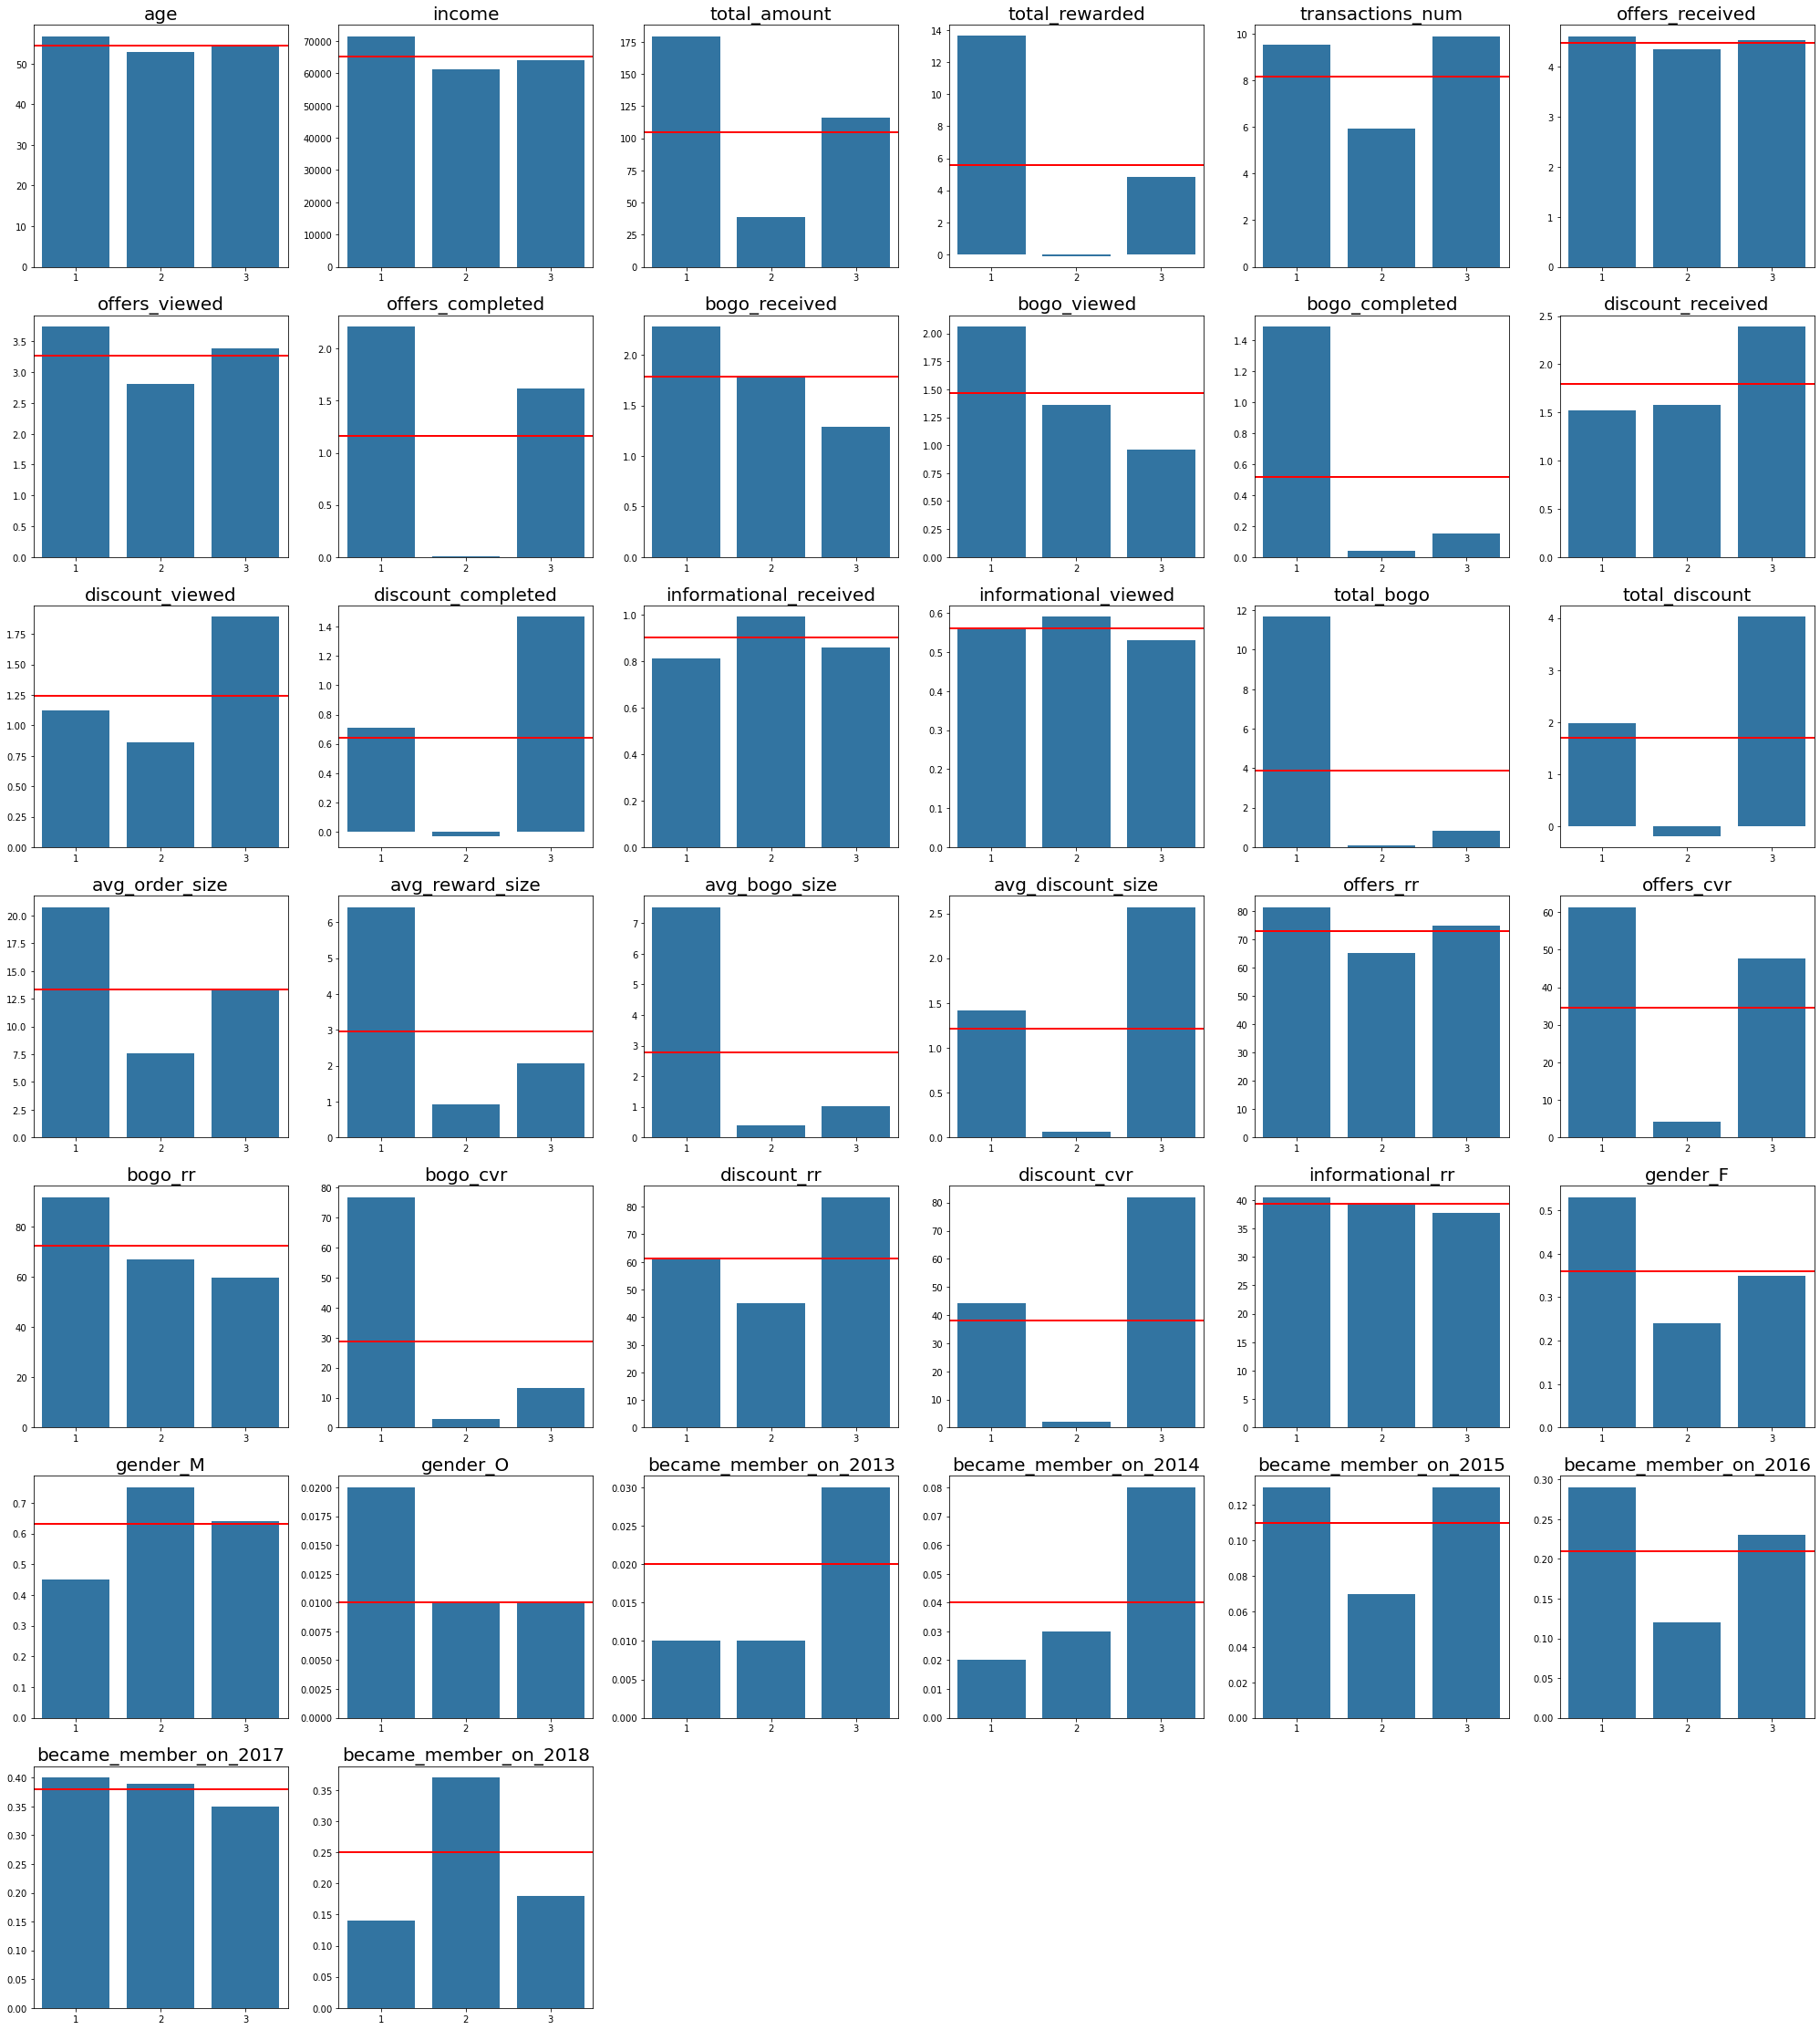

In [98]:
number_subplots = len(cluster_df.T.columns)
base_color = sns.color_palette()[0]
plt.figure(figsize=(35, 40));

for i, each in enumerate(cluster_df.T.columns):
    ax = plt.subplot(int(number_subplots/6)+1,6,i+1)
    sns.barplot(y=each, x=['1', '2', '3'], data=cluster_df.T.iloc[:-1, :], color=base_color);
    plt.title(f"{each}", fontsize=20);
    ax.axhline(y=cluster_df.T[each][-1], linewidth=2, color='r');
    plt.ylabel("");

Note: from the clustering interpretation plots, we can see that there are three distinct segments:

## observations:

### Cluster 1 - "Buy-One-Get-One type (bogo) offers":
- age and income slightly above average
- total amount and total rewarded much higher than average
- BOGO_cvr ie recieved, viewed and offer completion is much higher as compared to other segments and clusters
- More females and others fall under this category as compared to number of males and other segments
- Became member on 2015/2016 much higher than in other segments

### Final statement

This is the only segment where female dominate over male. The customers in this group tend to be older and have higher income. They are loyal customers for few years already. They spend a lot - make huge orders and buy frequently. With such spending habits, no wonder that they are intersted in bogo and get rewarded the most. They complete bogo offers way beyond average, but also react to discounts from time to time.

### Cluster 2 -"Disinterested Type":
- total amount spend is much less than the average
- No total reward
- less than average number of transactions are made
- below average offers_rr, bogo_rr, discount_rr, average informational_rr
- very low, almost 0% offers_cvr, bogo_cvr, discount_cvr
- male dominant segment
- became_member_on_2018 higher than in other segments

### Final statement
This group of customers are predominantly male that just recently became members. They tend to spend not much with below average number of transactions and small average order size. Although slightly more than 60% in this group view offers, they don't complete them.

### Cluster 3 -" Discount Type"
- trunsactions_num above average
- avg_order_size average
- discount_cvr much higher than average and higher than in other segments
- mostly male
- became_member_on 2013/2014 higher than in other segments

### Final Statement
*This group of customers are also mostly male but with the longest membership status (since 2013/2014). They tend to receive more discounts, which they love and actively complete. Their spending habits are slightly above average - they make small orders, but buy frequently.